# CALCOLO OPINION LEADER

### Importazione librerire e dataframes

In [132]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from tabulate import tabulate
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob

In [133]:
tweet_users = pd.read_csv("../datasets/twitter/twitter_users.csv")
tweet_collection = pd.read_csv("../datasets/twitter/twitter_tweet_collection.csv")
# Importazione picco negativo
tweets_picco_0_neg = pd.read_csv("../dataframes/tweets_filtrati_picco_0_negativo_token_9032.csv")
# Importazione picchi positivi
tweets_picco_0_pos = pd.read_csv("../dataframes/tweets_filtrati_picco_0_token_6563.csv")
tweets_picco_1_pos = pd.read_csv("../dataframes/tweets_filtrati_picco_1_token_4037.csv")
tweets_picco_2_pos = pd.read_csv("../dataframes/tweets_filtrati_picco_2_token_12247.csv")
tweets_picco_3_pos = pd.read_csv("../dataframes/tweets_filtrati_picco_3_token_8898.csv")
tweets_picco_4_pos = pd.read_csv("../dataframes/tweets_filtrati_picco_4_token_4704.csv")

### Merge dei tweet e la descrizione degli autori di tali tweet per ogni picco

In [134]:
merge_data_neg_0_description = pd.merge(tweets_picco_0_neg, tweet_users, left_on='author_id', right_on='user_id').drop(columns=['user_id'])
merge_0_neg = pd.merge(merge_data_neg_0_description, tweet_collection, left_on='tweet_id', right_on='tweet_id')

merge_data_0_description = pd.merge(tweets_picco_0_pos, tweet_users, left_on='author_id', right_on='user_id').drop(columns=['user_id'])
merge_0_pos = pd.merge(merge_data_0_description, tweet_collection, left_on='tweet_id', right_on='tweet_id')

merge_data_1_description = pd.merge(tweets_picco_1_pos, tweet_users, left_on='author_id', right_on='user_id').drop(columns=['user_id'])
merge_1_pos = pd.merge(merge_data_1_description, tweet_collection, left_on='tweet_id', right_on='tweet_id')

merge_data_2_description = pd.merge(tweets_picco_2_pos, tweet_users, left_on='author_id', right_on='user_id').drop(columns=['user_id'])
merge_2_pos = pd.merge(merge_data_2_description, tweet_collection, left_on='tweet_id', right_on='tweet_id')

merge_data_3_description = pd.merge(tweets_picco_3_pos, tweet_users, left_on='author_id', right_on='user_id').drop(columns=['user_id'])
merge_3_pos = pd.merge(merge_data_3_description, tweet_collection, left_on='tweet_id', right_on='tweet_id')

merge_data_4_description = pd.merge(tweets_picco_4_pos, tweet_users, left_on='author_id', right_on='user_id').drop(columns=['user_id'])
merge_4_pos = pd.merge(merge_data_4_description, tweet_collection, left_on='tweet_id', right_on='tweet_id')

# Token negativo 9032

### GRAFO DELLA CLUSTERIZZAZIONE DELLA KMEANS per token 9032

Utilizzo il metodo della silhoutte per trovare qual'è il miglior k (ossia il miglior numero di cluster) per la riuscita della ricerca

In [135]:
X = merge_0_neg[['retweet_count', 'like_count', 'quote_count', 'reply_count']]

# Calcolo per i punteggi Silhouette per k che varia da 2 a 4
silhouette_scores = []
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Per n_clusters = {k}, la media silhouette_score è: {silhouette_avg}")

# Trova il valore di k che massimizza il punteggio di Silhouette
best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Indice del massimo + 2 per ottenere il valore reale di k

# Applica il metodo k-means con il miglior valore di k
kmeans = KMeans(n_clusters=best_k, random_state=0)
merge_0_neg['cluster'] = kmeans.fit_predict(X)

# Mappa i cluster a etichette personalizzate
cluster_mapping = {0: 'Weak opinion leader', 1: 'Strong opinion leader'}
merge_0_neg['opinion_leader'] = merge_0_neg['cluster'].map(cluster_mapping)


Per n_clusters = 2, la media silhouette_score è: 0.9934366165486519
Per n_clusters = 3, la media silhouette_score è: 0.9873122318436764
Per n_clusters = 4, la media silhouette_score è: 0.979974796885924


Troviamo quindi che k=2 ha il valore di sihlouette migliore per la clusterizzazione di questo dataframe, per questo utilizziamo solo due classi (top OL e weak OL)

### GRAFICO K-MEANS per token 9032

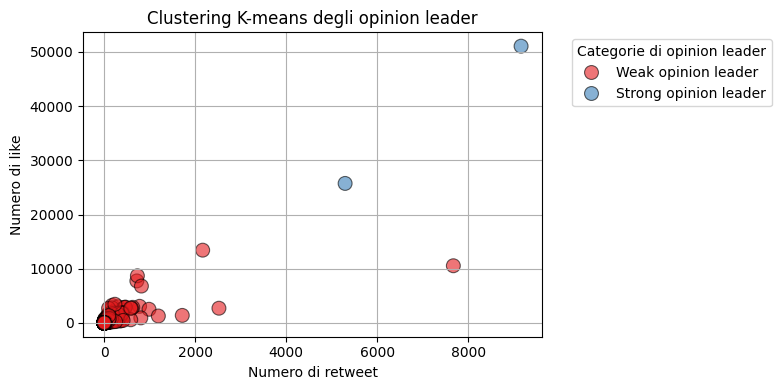

In [136]:
plt.figure(figsize = (8, 4))
sns.scatterplot(
    data = merge_0_neg,
    x = 'retweet_count',
    y = 'like_count',
    hue = 'opinion_leader',
    palette = 'Set1',
    s = 100,
    alpha = 0.6,
    edgecolor = 'black'
)

plt.xlabel('Numero di retweet')
plt.ylabel('Numero di like')
plt.title('Clustering K-means degli opinion leader')
plt.legend(title='Categorie di opinion leader', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout() 
plt.show()

In [137]:
strong_opinion_leaders = merge_0_neg[merge_0_neg['opinion_leader'] == 'Strong opinion leader']

num_strong_opinion_leaders = strong_opinion_leaders.shape[0]
print(f"Numero di strong opinion leader: {num_strong_opinion_leaders}")
tweet_counts = strong_opinion_leaders['author_id'].value_counts()
print("\nNumero di tweet per ciascun strong opinion leader:")

for author_id, count in tweet_counts.items():
    print(f"Autor ID: {author_id}, Numero di tweet: {count}")

# informazioni dei tweet degli strong opinion leader
table = strong_opinion_leaders[['retweet_count', 'like_count', 'quote_count', 'reply_count', 
                                'author_id', 'tweet_id', 'content', 'description', 
                                'Sentiment', 'collection']].reset_index(drop=True)

# Converti il dataframe in una lista di tuple per tabulate
table_data = [tuple(x) for x in table.values]

headers = ['Retweet Count', 'Like Count', 'Quote Count', 'Reply Count', 
           'Author ID', 'Tweet ID', 'Content', 'Description', 
           'Sentiment', 'Collection']
print("\nInformazioni dettagliate dei tweet degli strong opinion leader:")
print(tabulate(table_data, headers=headers, tablefmt='grid'))

# Filtra le informazioni degli utenti per gli strong opinion leader
strong_opinion_leader_ids = strong_opinion_leaders['author_id'].unique()
strong_opinion_leader_info = tweet_users[tweet_users['user_id'].isin(strong_opinion_leader_ids)]

# Converti il dataframe in una lista di tuple per tabulate
user_table_data = [tuple(x) for x in strong_opinion_leader_info.values]

# Intestazioni delle colonne per la tabella delle informazioni degli utenti
user_headers = list(strong_opinion_leader_info.columns)
print("\nInformazioni degli utenti strong opinion leader:")
print(tabulate(user_table_data, headers=user_headers, tablefmt='grid'))


Numero di strong opinion leader: 2

Numero di tweet per ciascun strong opinion leader:
Autor ID: 1346168171187863553, Numero di tweet: 1
Autor ID: 942461740041801733, Numero di tweet: 1

Informazioni dettagliate dei tweet degli strong opinion leader:
+-----------------+--------------+---------------+---------------+---------------------+---------------------+------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------+--------------+
|   Retweet Count |   Like Count |   Quote Count |   Reply Count |           Author ID |            Tweet ID | Content                                              | Description                                                                                                                                                  | Sentiment   | Collection   |
+=================+==============+=======

## sentiment analysis delle descrizioni delle bio degli opinion leader per vedere se sono effettivamente inerenti al contesto NFT o meno

In [138]:
# Funzione per verificare la presenza di parole chiave relative agli NFT
def contains_nft_keywords(description, keywords=['nft', 'crypto', 'blockchain', 'digital art', 'doodles', 'apes', 'token', 'fungible', 'ethereum', 'collection', 'cryptopunks', 'nfts', 'nftcollector', 'opensea', 'cryptopunk']):
    tokens = word_tokenize(description.lower())
    filtered_tokens = [word for word in tokens if word.isalnum()]
    relevant_tokens = [word for word in filtered_tokens if word in keywords]
    return len(relevant_tokens) > 0

strong_opinion_leaders['dedito_agli_nft'] = strong_opinion_leaders['description'].apply(contains_nft_keywords)

print("Descrizioni e se sono inerenti agli NFT:")
print(strong_opinion_leaders[['description', 'dedito_agli_nft']])

# Funzione per analizzare il sentiment
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Aggiungi una colonna con il punteggio di sentiment
strong_opinion_leaders['description_sentiment'] = strong_opinion_leaders['description'].apply(analyze_sentiment)

# Filtra le descrizioni inerenti agli NFT
nft_related_descriptions = strong_opinion_leaders[strong_opinion_leaders['dedito_agli_nft']]

print("\nDescrizioni inerenti agli NFT e i loro sentiment:")
print(nft_related_descriptions[['description', 'description_sentiment', 'author_id', 'tweet_id']])

Descrizioni e se sono inerenti agli NFT:
                                            description  dedito_agli_nft
16    uhhh hi... i draw sometimes • 22 • she/her • p...            False
1459  soup's on, baby 🇵🇸 | draws sometimes | works o...            False

Descrizioni inerenti agli NFT e i loro sentiment:
Empty DataFrame
Columns: [description, description_sentiment, author_id, tweet_id]
Index: []


/var/folders/j6/1lxb8g2n5l52sjcnr7jwm8yc0000gn/T/ipykernel_6139/1713841249.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strong_opinion_leaders['dedito_agli_nft'] = strong_opinion_leaders['description'].apply(contains_nft_keywords)
/var/folders/j6/1lxb8g2n5l52sjcnr7jwm8yc0000gn/T/ipykernel_6139/1713841249.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strong_opinion_leaders['description_sentiment'] = strong_opinion_leaders['description'].apply(analyze_sentiment)


# Token positivo 6563

### GRAFO DELLA CLUSTERIZZAZIONE DELLA KMEANS per token 6563

In [139]:
X = merge_0_pos[['retweet_count', 'like_count', 'quote_count', 'reply_count']]

# Calcola i punteggi Silhouette per k che varia da 2 a 4
silhouette_scores = []
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Per n_clusters = {k}, la media silhouette_score è: {silhouette_avg}")

# Trova il valore di k che massimizza il punteggio di Silhouette
best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Indice del massimo + 2 per ottenere il valore reale di k

# Applica il metodo k-means con il miglior valore di k
kmeans = KMeans(n_clusters=best_k, random_state=0)
merge_0_pos['cluster'] = kmeans.fit_predict(X)

# Mappa i cluster 
cluster_mapping = {0: 'Weak opinion leader', 1: 'Strong opinion leader'} 
merge_0_pos['opinion_leader'] = merge_0_pos['cluster'].map(cluster_mapping)

Per n_clusters = 2, la media silhouette_score è: 0.9842941068839618
Per n_clusters = 3, la media silhouette_score è: 0.963584852098141
Per n_clusters = 4, la media silhouette_score è: 0.8924131062556514


##### GRAFICO K-MEANS per token 6563

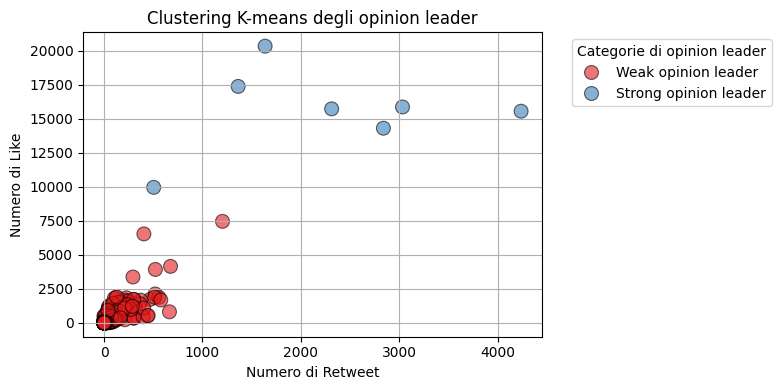

In [140]:
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data = merge_0_pos,
    x = 'retweet_count',
    y = 'like_count',
    hue = 'opinion_leader',
    palette ='Set1',
    s = 100,
    alpha = 0.6,
    edgecolor = 'black' 
)

plt.xlabel('Numero di Retweet')
plt.ylabel('Numero di Like')
plt.title('Clustering K-means degli opinion leader')
plt.legend(title='Categorie di opinion leader', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout() 
plt.show()

In [141]:
strong_opinion_leaders = merge_0_pos[merge_0_pos['opinion_leader'] == 'Strong opinion leader']

num_strong_opinion_leaders = strong_opinion_leaders.shape[0]
print(f"Numero di strong opinion leader: {num_strong_opinion_leaders}")
tweet_counts = strong_opinion_leaders['author_id'].value_counts()
print("\nNumero di tweet per ciascun strong opinion leader:")

for author_id, count in tweet_counts.items():
    print(f"Autor ID: {author_id}, Numero di tweet: {count}")

# informazioni dei tweet degli strong opinion leader
table = strong_opinion_leaders[['retweet_count', 'like_count', 'quote_count', 'reply_count', 
                                'author_id', 'tweet_id', 'content', 'description', 
                                'Sentiment', 'collection']].reset_index(drop=True)

# Converti il dataframe in una lista di tuple per tabulate
table_data = [tuple(x) for x in table.values]

# Intestazioni delle colonne per la tabella
headers = ['Retweet Count', 'Like Count', 'Quote Count', 'Reply Count', 
           'Author ID', 'Tweet ID', 'Content', 'Description', 
           'Sentiment', 'Collection']
print("\nInformazioni dettagliate dei tweet degli strong opinion leader:")
print(tabulate(table_data, headers=headers, tablefmt='grid'))

# Filtra le informazioni degli utenti per gli strong opinion leader
strong_opinion_leader_ids = strong_opinion_leaders['author_id'].unique()
strong_opinion_leader_info = tweet_users[tweet_users['user_id'].isin(strong_opinion_leader_ids)]

# Converti il dataframe in una lista di tuple per tabulate
user_table_data = [tuple(x) for x in strong_opinion_leader_info.values]

# Intestazioni delle colonne per la tabella delle informazioni degli utenti
user_headers = list(strong_opinion_leader_info.columns)
print("\nInformazioni degli utenti strong opinion leader:")
print(tabulate(user_table_data, headers=user_headers, tablefmt='grid'))


Numero di strong opinion leader: 7

Numero di tweet per ciascun strong opinion leader:
Autor ID: 1374890890179710979, Numero di tweet: 1
Autor ID: 1096947589755428864, Numero di tweet: 1
Autor ID: 2954090659, Numero di tweet: 1
Autor ID: 1366597668525379587, Numero di tweet: 1
Autor ID: 426499821, Numero di tweet: 1
Autor ID: 14130366, Numero di tweet: 1
Autor ID: 1368184198138322946, Numero di tweet: 1

Informazioni dettagliate dei tweet degli strong opinion leader:
+-----------------+--------------+---------------+---------------+---------------------+---------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------+--------------+
|   Retweet Coun

In [142]:
# Funzione per verificare la presenza di parole chiave relative agli NFT
def contains_nft_keywords(description, keywords=['nft', 'crypto', 'blockchain', 'digital art', 'doodles', 'apes', 'token', 'fungible', 'ethereum', 'collection', 'cryptopunks', 'nfts', 'nftcollector', 'opensea', 'cryptopunk']):
    tokens = word_tokenize(description.lower())
    filtered_tokens = [word for word in tokens if word.isalnum()]
    relevant_tokens = [word for word in filtered_tokens if word in keywords]
    return len(relevant_tokens) > 0

# Aggiungi una colonna che indica se la descrizione è inerente agli NFT
strong_opinion_leaders['dedito_agli_nft'] = strong_opinion_leaders['description'].apply(contains_nft_keywords)

print("Descrizioni e se sono inerenti agli NFT:")
print(strong_opinion_leaders[['description', 'dedito_agli_nft']])

# Funzione per analizzare il sentiment
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

strong_opinion_leaders['description_sentiment'] = strong_opinion_leaders['description'].apply(analyze_sentiment)
nft_related_descriptions = strong_opinion_leaders[strong_opinion_leaders['dedito_agli_nft']]

print("\nDescrizioni inerenti agli NFT e i loro sentiment:")
print(nft_related_descriptions[['description', 'description_sentiment', 'author_id', 'tweet_id']])

Descrizioni e se sono inerenti agli NFT:
                                            description  dedito_agli_nft
209   subscribe to captain puffy\n\nstan puffy. quee...            False
276   i hope my art can make you smile! 🥳丨💚丨Twitch A...            False
454   i draw stuff and board for tv but MOSTLY i dra...            False
680                                it boy, the rockstar            False
884   indie art studio (and sometimes person) | crea...            False
1377                          CEO,  Google and Alphabet            False
1380             Just a humble ghost  O_O\n✨no reposts✨            False

Descrizioni inerenti agli NFT e i loro sentiment:
Empty DataFrame
Columns: [description, description_sentiment, author_id, tweet_id]
Index: []


/var/folders/j6/1lxb8g2n5l52sjcnr7jwm8yc0000gn/T/ipykernel_6139/1152084796.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strong_opinion_leaders['dedito_agli_nft'] = strong_opinion_leaders['description'].apply(contains_nft_keywords)
/var/folders/j6/1lxb8g2n5l52sjcnr7jwm8yc0000gn/T/ipykernel_6139/1152084796.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strong_opinion_leaders['description_sentiment'] = strong_opinion_leaders['description'].apply(analyze_sentiment)


# Token positivo 4037

### GRAFO DELLA CLUSTERIZZAZIONE DELLA KMEANS per token 4037

In [143]:
X = merge_1_pos[['retweet_count', 'like_count', 'quote_count', 'reply_count']]

# Calcola i punteggi Silhouette per k che varia da 2 a 4
silhouette_scores = []
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Per n_clusters = {k}, la media silhouette_score è: {silhouette_avg}")

# Trova il valore di k che massimizza il punteggio di Silhouette
best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Indice del massimo + 2 per ottenere il valore reale di k

# Applica il metodo k-means con il miglior valore di k
kmeans = KMeans(n_clusters=best_k, random_state=0)
merge_1_pos['cluster'] = kmeans.fit_predict(X)

# Mappa i cluster 
cluster_mapping = {0: 'Weak opinion leader', 1: 'Strong opinion leader'} 
merge_1_pos['opinion_leader'] = merge_1_pos['cluster'].map(cluster_mapping)

Per n_clusters = 2, la media silhouette_score è: 0.9830652848432722
Per n_clusters = 3, la media silhouette_score è: 0.9301996443391447
Per n_clusters = 4, la media silhouette_score è: 0.8993435781759644


### GRAFICO K-MEANS per token 4037

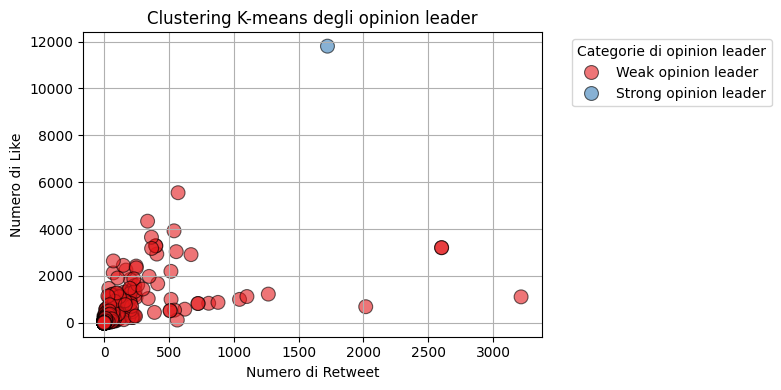

In [144]:
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data = merge_1_pos,
    x = 'retweet_count',
    y = 'like_count',
    hue = 'opinion_leader',
    palette = 'Set1',
    s = 100,
    alpha = 0.6,
    edgecolor = 'black' 
)

plt.xlabel('Numero di Retweet')
plt.ylabel('Numero di Like')
plt.title('Clustering K-means degli opinion leader')
plt.legend(title='Categorie di opinion leader', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout() 
plt.show()

In [145]:
strong_opinion_leaders = merge_1_pos[merge_1_pos['opinion_leader'] == 'Strong opinion leader']

num_strong_opinion_leaders = strong_opinion_leaders.shape[0]
print(f"Numero di strong opinion leader: {num_strong_opinion_leaders}")
tweet_counts = strong_opinion_leaders['author_id'].value_counts()
print("\nNumero di tweet per ciascun strong opinion leader:")

for author_id, count in tweet_counts.items():
    print(f"Autor ID: {author_id}, Numero di tweet: {count}")

table = strong_opinion_leaders[['retweet_count', 'like_count', 'quote_count', 'reply_count', 
                                'author_id', 'tweet_id', 'content', 'description', 
                                'Sentiment', 'collection']].reset_index(drop=True)

# Converti il dataframe in una lista di tuple per tabulate
table_data = [tuple(x) for x in table.values]

# Intestazioni delle colonne per la tabella
headers = ['Retweet Count', 'Like Count', 'Quote Count', 'Reply Count', 
           'Author ID', 'Tweet ID', 'Content', 'Description', 
           'Sentiment', 'Collection']
print("\nInformazioni dettagliate dei tweet degli strong opinion leader:")
print(tabulate(table_data, headers=headers, tablefmt='grid'))

# Filtra le informazioni degli utenti per gli strong opinion leader
strong_opinion_leader_ids = strong_opinion_leaders['author_id'].unique()
strong_opinion_leader_info = tweet_users[tweet_users['user_id'].isin(strong_opinion_leader_ids)]

# Converti il dataframe in una lista di tuple per tabulate
user_table_data = [tuple(x) for x in strong_opinion_leader_info.values]

# Intestazioni delle colonne per la tabella delle informazioni degli utenti
user_headers = list(strong_opinion_leader_info.columns)
print("\nInformazioni degli utenti strong opinion leader:")
print(tabulate(user_table_data, headers=user_headers, tablefmt='grid'))


Numero di strong opinion leader: 1

Numero di tweet per ciascun strong opinion leader:
Autor ID: 1025339104865730560, Numero di tweet: 1

Informazioni dettagliate dei tweet degli strong opinion leader:
+-----------------+--------------+---------------+---------------+---------------------+---------------------+------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------+-------------+--------------+
|   Retweet Count |   Like Count |   Quote Count |   Reply Count |           Author ID |            Tweet ID | Content                                              | Description                                                                                                                                             | Sentiment   | Collection   |
+=================+==============+===============+===============+=====================+============

In [146]:
# Funzione per verificare la presenza di parole chiave relative agli NFT
def contains_nft_keywords(description, keywords=['nft', 'crypto', 'blockchain', 'digital art', 'doodles', 'apes', 'token', 'fungible', 'ethereum', 'collection', 'cryptopunks', 'nfts', 'nftcollector', 'opensea', 'cryptopunk']):
    tokens = word_tokenize(description.lower())
    filtered_tokens = [word for word in tokens if word.isalnum()]
    relevant_tokens = [word for word in filtered_tokens if word in keywords]
    return len(relevant_tokens) > 0

# Aggiungi una colonna che indica se la descrizione è inerente agli NFT
strong_opinion_leaders['dedito_agli_nft'] = strong_opinion_leaders['description'].apply(contains_nft_keywords)

print("Descrizioni e se sono inerenti agli NFT:")
print(strong_opinion_leaders[['description', 'dedito_agli_nft']])

# Funzione per analizzare il sentiment
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Aggiungi una colonna con il punteggio di sentiment
strong_opinion_leaders['description_sentiment'] = strong_opinion_leaders['description'].apply(analyze_sentiment)

# Filtra le descrizioni inerenti agli NFT
nft_related_descriptions = strong_opinion_leaders[strong_opinion_leaders['dedito_agli_nft']]

print("\nDescrizioni inerenti agli NFT e i loro sentiment:")
print(nft_related_descriptions[['description', 'description_sentiment', 'author_id', 'tweet_id']])

Descrizioni e se sono inerenti agli NFT:
                                            description  dedito_agli_nft
1515  Juice | SPOILERS | multifandom! im into like 4...            False

Descrizioni inerenti agli NFT e i loro sentiment:
Empty DataFrame
Columns: [description, description_sentiment, author_id, tweet_id]
Index: []


/var/folders/j6/1lxb8g2n5l52sjcnr7jwm8yc0000gn/T/ipykernel_6139/3293602307.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strong_opinion_leaders['dedito_agli_nft'] = strong_opinion_leaders['description'].apply(contains_nft_keywords)
/var/folders/j6/1lxb8g2n5l52sjcnr7jwm8yc0000gn/T/ipykernel_6139/3293602307.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strong_opinion_leaders['description_sentiment'] = strong_opinion_leaders['description'].apply(analyze_sentiment)


# Token positivo 12247

### GRAFO DELLA CLUSTERIZZAZIONE DELLA KMEANS per token 12247

In [147]:
X = merge_2_pos[['retweet_count', 'like_count', 'quote_count', 'reply_count']]

# Calcola i punteggi Silhouette per k che varia da 2 a 4
silhouette_scores = []
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Per n_clusters = {k}, la media silhouette_score è: {silhouette_avg}")

# Trova il valore di k che massimizza il punteggio di Silhouette
best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Indice del massimo + 2 per ottenere il valore reale di k

# Applica il metodo k-means con il miglior valore di k
kmeans = KMeans(n_clusters=best_k, random_state=0)
merge_2_pos['cluster'] = kmeans.fit_predict(X)

# Mappa i cluster a etichette personalizzate
cluster_mapping = {0: 'Weak opinion leader', 1: 'Medium opinion leader', 2: 'Strong opinion leader'}
merge_2_pos['opinion_leader'] = merge_2_pos['cluster'].map(cluster_mapping)

Per n_clusters = 2, la media silhouette_score è: 0.9195794313364481
Per n_clusters = 3, la media silhouette_score è: 0.8712150593877823
Per n_clusters = 4, la media silhouette_score è: 0.8478248380248247


## forzatura sul numero dei cluster andando contro al suggerimento del metodo silhouette, PROVIAMO CON 3 CLUSTER!

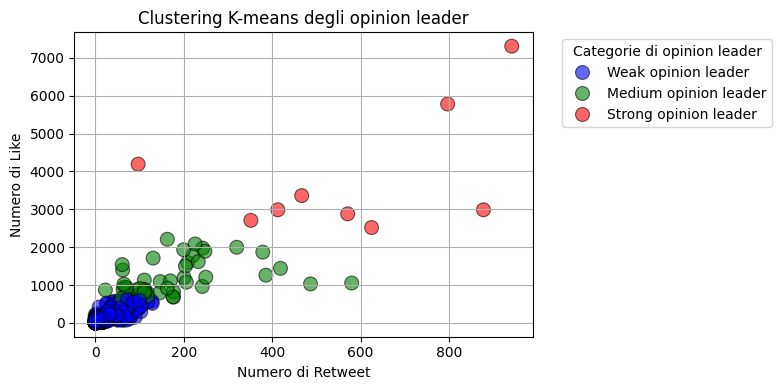

In [148]:
X = merge_2_pos[['retweet_count', 'like_count', 'quote_count', 'reply_count']]

# Imposta il numero di cluster a 3
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
merge_2_pos['cluster'] = kmeans.fit_predict(X)
# Definisci l'ordine 
desired_order = [0, 1, 2]
merge_2_pos['cluster'] = merge_2_pos['cluster'].replace({2: 1, 1: 2})

# Mappa i cluster a etichette personalizzate
cluster_mapping = {0: 'Weak opinion leader', 1: 'Medium opinion leader', 2: 'Strong opinion leader'}

merge_2_pos['opinion_leader'] = merge_2_pos['cluster'].map(cluster_mapping)
palette = {'Weak opinion leader': 'blue', 'Medium opinion leader': 'green', 'Strong opinion leader': 'red'}

plt.figure(figsize=(8, 4))
sns.scatterplot(
    data=merge_2_pos,
    x='retweet_count',
    y='like_count',
    hue='opinion_leader',
    palette=palette,
    s=100,
    alpha=0.6,
    edgecolor='black'
)

plt.xlabel('Numero di Retweet')
plt.ylabel('Numero di Like')
plt.title('Clustering K-means degli opinion leader')
plt.legend(title='Categorie di opinion leader', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### GRAFICO K-MEANS per token 12247

Per n_clusters = 2, la media silhouette_score è: 0.9195794313364481
Per n_clusters = 3, la media silhouette_score è: 0.8712150593877823
Per n_clusters = 4, la media silhouette_score è: 0.8478248380248247


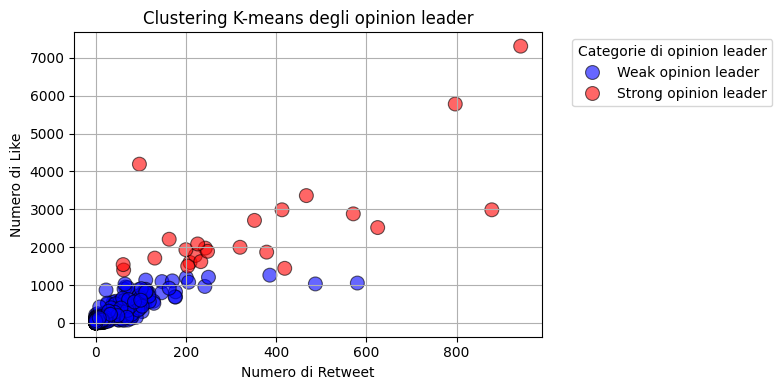

In [149]:
X = merge_2_pos[['retweet_count', 'like_count', 'quote_count', 'reply_count']]

# Calcola i punteggi Silhouette per k che varia da 2 a 4
silhouette_scores = []
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Per n_clusters = {k}, la media silhouette_score è: {silhouette_avg}")

# Trova il valore di k che massimizza il punteggio di Silhouette
best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Indice del massimo + 2 per ottenere il valore reale di k

# Applica il metodo k-means con il miglior valore di k
kmeans = KMeans(n_clusters=best_k, random_state=0)
merge_2_pos['cluster'] = kmeans.fit_predict(X)

# Mappa i cluster a etichette personalizzate
cluster_mapping = {0: 'Weak opinion leader', 1: 'Strong opinion leader'}  
merge_2_pos['opinion_leader'] = merge_2_pos['cluster'].map(cluster_mapping)

plt.figure(figsize=(8, 4))
sns.scatterplot(
    data=merge_2_pos,
    x='retweet_count',
    y='like_count',
    hue='opinion_leader',
    palette=palette,
    s=100,
    alpha=0.6,
    edgecolor='black'
)

plt.xlabel('Numero di Retweet')
plt.ylabel('Numero di Like')
plt.title('Clustering K-means degli opinion leader')
plt.legend(title='Categorie di opinion leader', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [150]:
strong_opinion_leaders = merge_2_pos[merge_2_pos['opinion_leader'] == 'Strong opinion leader']

num_strong_opinion_leaders = strong_opinion_leaders.shape[0]
print(f"Numero di strong opinion leader: {num_strong_opinion_leaders}")
tweet_counts = strong_opinion_leaders['author_id'].value_counts()
print("\nNumero di tweet per ciascun strong opinion leader:")

for author_id, count in tweet_counts.items():
    print(f"Autor ID: {author_id}, Numero di tweet: {count}")

# Stampa le informazioni dei tweet degli strong opinion leader
table = strong_opinion_leaders[['retweet_count', 'like_count', 'quote_count', 'reply_count', 
                                'author_id', 'tweet_id', 'content', 'description', 
                                'Sentiment', 'collection']].reset_index(drop=True)

# Converti il dataframe in una lista di tuple per tabulate
table_data = [tuple(x) for x in table.values]

# Intestazioni delle colonne per la tabella
headers = ['Retweet Count', 'Like Count', 'Quote Count', 'Reply Count', 
           'Author ID', 'Tweet ID', 'Content', 'Description', 
           'Sentiment', 'Collection']
print("\nInformazioni dettagliate dei tweet degli strong opinion leader:")
print(tabulate(table_data, headers=headers, tablefmt='grid'))

# Filtra le informazioni degli utenti per gli strong opinion leader
strong_opinion_leader_ids = strong_opinion_leaders['author_id'].unique()
strong_opinion_leader_info = tweet_users[tweet_users['user_id'].isin(strong_opinion_leader_ids)]

# Converti il dataframe in una lista di tuple per tabulate
user_table_data = [tuple(x) for x in strong_opinion_leader_info.values]

# Intestazioni delle colonne per la tabella delle informazioni degli utenti
user_headers = list(strong_opinion_leader_info.columns)
print("\nInformazioni degli utenti strong opinion leader:")
print(tabulate(user_table_data, headers=user_headers, tablefmt='grid'))


Numero di strong opinion leader: 24

Numero di tweet per ciascun strong opinion leader:
Autor ID: 1212085986726797312, Numero di tweet: 1
Autor ID: 4033772715, Numero di tweet: 1
Autor ID: 1025850185669324801, Numero di tweet: 1
Autor ID: 129707325, Numero di tweet: 1
Autor ID: 189056673, Numero di tweet: 1
Autor ID: 719858398335012864, Numero di tweet: 1
Autor ID: 370517645, Numero di tweet: 1
Autor ID: 1125300004380274688, Numero di tweet: 1
Autor ID: 719236395122954244, Numero di tweet: 1
Autor ID: 721297713116090368, Numero di tweet: 1
Autor ID: 1246904107052355589, Numero di tweet: 1
Autor ID: 1255201804461256704, Numero di tweet: 1
Autor ID: 245245284, Numero di tweet: 1
Autor ID: 3247348406, Numero di tweet: 1
Autor ID: 1009004130579304448, Numero di tweet: 1
Autor ID: 932069874867642368, Numero di tweet: 1
Autor ID: 250348446, Numero di tweet: 1
Autor ID: 932346656212779008, Numero di tweet: 1
Autor ID: 1069940255170666497, Numero di tweet: 1
Autor ID: 3226609357, Numero di twe

In [151]:
# Funzione per verificare la presenza di parole chiave relative agli NFT
def contains_nft_keywords(description, keywords=['nft', 'crypto', 'blockchain', 'digital art', 'Doodles', 'apes', 'token', 'fungible', 'ethereum', 'collection', 'cryptopunks', 'nfts', 'nftcollector', 'opensea', 'cryptopunk']):
    tokens = word_tokenize(description.lower())
    filtered_tokens = [word for word in tokens if word.isalnum()]
    relevant_tokens = [word for word in filtered_tokens if word in keywords]
    return len(relevant_tokens) > 0

# Aggiungi una colonna che indica se la descrizione è inerente agli NFT
strong_opinion_leaders['dedito_agli_nft'] = strong_opinion_leaders['description'].apply(contains_nft_keywords)

print("Descrizioni e se sono inerenti agli NFT:")
print(strong_opinion_leaders[['description', 'dedito_agli_nft']])

# Funzione per analizzare il sentiment
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Aggiungi una colonna con il punteggio di sentiment
strong_opinion_leaders['description_sentiment'] = strong_opinion_leaders['description'].apply(analyze_sentiment)

# Filtra le descrizioni inerenti agli NFT
nft_related_descriptions = strong_opinion_leaders[strong_opinion_leaders['dedito_agli_nft']]

print("\nDescrizioni inerenti agli NFT e i loro sentiment:")
print(nft_related_descriptions[['description', 'description_sentiment', 'author_id', 'tweet_id']])

Descrizioni e se sono inerenti agli NFT:
                                           description  dedito_agli_nft
50   Dewa's art-only account! o/\nMain acc: @dewbor...            False
67   I draw the webcomic Countdown to Countdown | S...            False
86   | he/him | ✨Certified Himbo ✨| 🇵🇷🇮🇹🏳️‍⚧️ | 24 ...            False
90   Hi there! I'm Monsterjuice!\n☆ He/him ☆ Art ac...            False
120  I draw questionable stuff. \nItalian - 30+ - M...            False
153  Comic artist & Illustrator / 25 / (He/Him) / I...            False
205  Artist who enjoys creating and curating chubby...            False
224  🥖🇫🇷🇵🇹🏳️‍🌈🥐 Wannabe Space Cowboy who draws in h...            False
231  Illustration, animation, voice acting and bad ...            False
248  🌧 Eden Laing ☀️ artist/animator 🌧 ✨ dm for wor...            False
325  20↑ ✦ Artist ✦ Comms: CLOSED ✦ I draw whatever...            False
389  𓆝 Moth/Benji | 24 | queer & poly T4T 🏳️‍⚧️| he...            False
511  Voice Actor & 1/2 

/var/folders/j6/1lxb8g2n5l52sjcnr7jwm8yc0000gn/T/ipykernel_6139/4217184727.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strong_opinion_leaders['dedito_agli_nft'] = strong_opinion_leaders['description'].apply(contains_nft_keywords)
/var/folders/j6/1lxb8g2n5l52sjcnr7jwm8yc0000gn/T/ipykernel_6139/4217184727.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strong_opinion_leaders['description_sentiment'] = strong_opinion_leaders['description'].apply(analyze_sentiment)


# Token positivo 8898

### GRAFO DELLA CLUSTERIZZAZIONE DELLA KMEANS (3) per token 8898

In [152]:
# Colonne rilevanti per il clustering
X = merge_3_pos[['retweet_count', 'like_count', 'quote_count', 'reply_count']]

# Calcola i punteggi Silhouette per k che varia da 2 a 4
silhouette_scores = []
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Per n_clusters = {k}, la media silhouette_score è: {silhouette_avg}")

# Trova il valore di k che massimizza il punteggio di Silhouette
best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Indice del massimo + 2 per ottenere il valore reale di k

# Applica il metodo k-means con il miglior valore di k
kmeans = KMeans(n_clusters=best_k, random_state=0)
merge_3_pos['cluster'] = kmeans.fit_predict(X)

# Mappa i cluster a etichette personalizzate
cluster_mapping = {0: 'Weak opinion leader', 1: 'Strong opinion leader'} 
merge_3_pos['opinion_leader'] = merge_3_pos['cluster'].map(cluster_mapping)

Per n_clusters = 2, la media silhouette_score è: 0.9418875233812839
Per n_clusters = 3, la media silhouette_score è: 0.8959531001024026
Per n_clusters = 4, la media silhouette_score è: 0.8509388924421342


## forzatura sul numero dei cluster andando contro al suggerimento del metodo silhouette, PROVIAMO CON 3 CLUSTER!

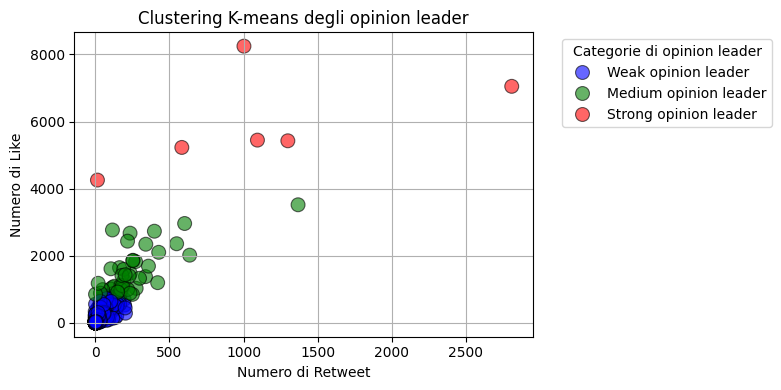

In [153]:
X = merge_3_pos[['retweet_count', 'like_count', 'quote_count', 'reply_count']]

# Imposta il numero di cluster a 3
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
merge_3_pos['cluster'] = kmeans.fit_predict(X)

cluster_mapping = {0: 'Weak opinion leader', 1: 'Medium opinion leader', 2: 'Strong opinion leader'}
merge_3_pos['opinion_leader'] = merge_3_pos['cluster'].map(cluster_mapping)
palette = {'Weak opinion leader': 'blue', 'Medium opinion leader': 'green', 'Strong opinion leader': 'red'}

plt.figure(figsize=(8, 4))
sns.scatterplot(
    data=merge_3_pos,
    x='retweet_count',
    y='like_count',
    hue='opinion_leader',
    palette=palette,
    s=100,
    alpha=0.6,
    edgecolor='black'
)

plt.xlabel('Numero di Retweet')
plt.ylabel('Numero di Like')
plt.title('Clustering K-means degli opinion leader')
plt.legend(title='Categorie di opinion leader', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### GRAFICO K-MEANS per token 8898

Per n_clusters = 2, la media silhouette_score è: 0.9418875233812839
Per n_clusters = 3, la media silhouette_score è: 0.8959531001024026
Per n_clusters = 4, la media silhouette_score è: 0.8509388924421342


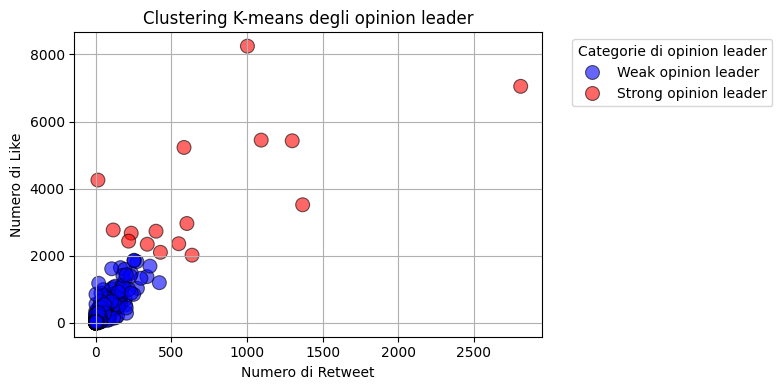

In [154]:
X = merge_3_pos[['retweet_count', 'like_count', 'quote_count', 'reply_count']]

# Calcola i punteggi Silhouette per k che varia da 2 a 4
silhouette_scores = []
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Per n_clusters = {k}, la media silhouette_score è: {silhouette_avg}")

# Trova il valore di k che massimizza il punteggio di Silhouette
best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Indice del massimo + 2 per ottenere il valore reale di k

# Applica il metodo k-means con il miglior valore di k
kmeans = KMeans(n_clusters=best_k, random_state=0)
merge_3_pos['cluster'] = kmeans.fit_predict(X)

# Mappa i cluster a etichette personalizzate
cluster_mapping = {0: 'Weak opinion leader', 1: 'Strong opinion leader'}  
merge_3_pos['opinion_leader'] = merge_3_pos['cluster'].map(cluster_mapping)

plt.figure(figsize=(8, 4))
sns.scatterplot(
    data=merge_3_pos,
    x='retweet_count',
    y='like_count',
    hue='opinion_leader',
    palette=palette,
    s=100,
    alpha=0.6,
    edgecolor='black'
)

plt.xlabel('Numero di Retweet')
plt.ylabel('Numero di Like')
plt.title('Clustering K-means degli opinion leader')
plt.legend(title='Categorie di opinion leader', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [155]:
strong_opinion_leaders = merge_3_pos[merge_3_pos['opinion_leader'] == 'Strong opinion leader']

num_strong_opinion_leaders = strong_opinion_leaders.shape[0]
print(f"Numero di strong opinion leader: {num_strong_opinion_leaders}")
tweet_counts = strong_opinion_leaders['author_id'].value_counts()
print("\nNumero di tweet per ciascun strong opinion leader:")

for author_id, count in tweet_counts.items():
    print(f"Autor ID: {author_id}, Numero di tweet: {count}")

# Stampa le informazioni dei tweet degli strong opinion leader
table = strong_opinion_leaders[['retweet_count', 'like_count', 'quote_count', 'reply_count', 
                                'author_id', 'tweet_id', 'content', 'description', 
                                'Sentiment', 'collection']].reset_index(drop=True)

# Converti il dataframe in una lista di tuple per tabulate
table_data = [tuple(x) for x in table.values]

# Intestazioni delle colonne per la tabella
headers = ['Retweet Count', 'Like Count', 'Quote Count', 'Reply Count', 
           'Author ID', 'Tweet ID', 'Content', 'Description', 
           'Sentiment', 'Collection']
print("\nInformazioni dettagliate dei tweet degli strong opinion leader:")
print(tabulate(table_data, headers=headers, tablefmt='grid'))

# Filtra le informazioni degli utenti per gli strong opinion leader
strong_opinion_leader_ids = strong_opinion_leaders['author_id'].unique()
strong_opinion_leader_info = tweet_users[tweet_users['user_id'].isin(strong_opinion_leader_ids)]

# Converti il dataframe in una lista di tuple per tabulate
user_table_data = [tuple(x) for x in strong_opinion_leader_info.values]

# Intestazioni delle colonne per la tabella delle informazioni degli utenti
user_headers = list(strong_opinion_leader_info.columns)
print("\nInformazioni degli utenti strong opinion leader:")
print(tabulate(user_table_data, headers=user_headers, tablefmt='grid'))


Numero di strong opinion leader: 16

Numero di tweet per ciascun strong opinion leader:
Autor ID: 1118098069352935424, Numero di tweet: 1
Autor ID: 1365820730630365185, Numero di tweet: 1
Autor ID: 922379257971580929, Numero di tweet: 1
Autor ID: 1901850734, Numero di tweet: 1
Autor ID: 857223839628972032, Numero di tweet: 1
Autor ID: 377916273, Numero di tweet: 1
Autor ID: 2171018338, Numero di tweet: 1
Autor ID: 1108246657752137728, Numero di tweet: 1
Autor ID: 1380064426074595330, Numero di tweet: 1
Autor ID: 1334570033754693633, Numero di tweet: 1
Autor ID: 1057000964832534532, Numero di tweet: 1
Autor ID: 1161351170742521856, Numero di tweet: 1
Autor ID: 152465691, Numero di tweet: 1
Autor ID: 1346503770, Numero di tweet: 1
Autor ID: 282881255, Numero di tweet: 1
Autor ID: 1091694725994815489, Numero di tweet: 1

Informazioni dettagliate dei tweet degli strong opinion leader:
+-----------------+--------------+---------------+---------------+---------------------+------------------

In [156]:
# Funzione per verificare la presenza di parole chiave relative agli NFT
def contains_nft_keywords(description, keywords=['nft', 'crypto', 'blockchain', 'digital art', 'Doodles', 'apes', 'token', 'fungible', 'ethereum', 'collection', 'cryptopunks', 'nfts', 'nftcollector', 'opensea', 'cryptopunk']):
    tokens = word_tokenize(description.lower())
    filtered_tokens = [word for word in tokens if word.isalnum()]
    relevant_tokens = [word for word in filtered_tokens if word in keywords]
    return len(relevant_tokens) > 0

# Aggiungi una colonna che indica se la descrizione è inerente agli NFT
strong_opinion_leaders['dedito_agli_nft'] = strong_opinion_leaders['description'].apply(contains_nft_keywords)

print("Descrizioni e se sono inerenti agli NFT:")
print(strong_opinion_leaders[['description', 'dedito_agli_nft']])

# Funzione per analizzare il sentiment
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Aggiungi una colonna con il punteggio di sentiment
strong_opinion_leaders['description_sentiment'] = strong_opinion_leaders['description'].apply(analyze_sentiment)

# Filtra le descrizioni inerenti agli NFT
nft_related_descriptions = strong_opinion_leaders[strong_opinion_leaders['dedito_agli_nft']]

print("\nDescrizioni inerenti agli NFT e i loro sentiment:")
print(nft_related_descriptions[['description', 'description_sentiment', 'author_id', 'tweet_id']])

Descrizioni e se sono inerenti agli NFT:
                                            description  dedito_agli_nft
133                               for svt’s little #호시🐯            False
266   20+ yo // NO MINORS //  might contain NSFW/dar...            False
295   izzy | 20 | she//they ⭐️✨ artist and animator ...            False
433      🇵🇹 | 👋  I draw\n contact: komemerdas@gmail.com            False
455   🇬🇧🇹🇭 | I do the art thing | use art with credi...            False
583   that bisexual devil | he/they | dirty filthy n...            False
605   🔞I post NSFW/adult content!!\n• 20 \n• Any/all...            False
631   comsci undergrad and digital artist! i love cu...            False
633   (🥖) MOONETTE/CERISE 🇵🇭/@moonetteandgalt | (🥔) ...            False
674   i am a gremlin for real‼️ the second @cuptoast...            False
777   popy/sophie | 21 | FR / EN / 中文 |  I live for ...            False
807   Cartoonist and animator from New Jersey. draws...            False
860   just

/var/folders/j6/1lxb8g2n5l52sjcnr7jwm8yc0000gn/T/ipykernel_6139/4217184727.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strong_opinion_leaders['dedito_agli_nft'] = strong_opinion_leaders['description'].apply(contains_nft_keywords)
/var/folders/j6/1lxb8g2n5l52sjcnr7jwm8yc0000gn/T/ipykernel_6139/4217184727.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strong_opinion_leaders['description_sentiment'] = strong_opinion_leaders['description'].apply(analyze_sentiment)


# Token positivo 4704

### GRAFO DELLA CLUSTERIZZAZIONE DELLA KMEANS (3) per token 4704

In [157]:
X = merge_4_pos[['retweet_count', 'like_count', 'quote_count', 'reply_count']]

# Calcola i punteggi Silhouette per k che varia da 2 a 4
silhouette_scores = []
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Per n_clusters = {k}, la media silhouette_score è: {silhouette_avg}")

# Trova il valore di k che massimizza il punteggio di Silhouette
best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Indice del massimo + 2 per ottenere il valore reale di k

# Applica il metodo k-means con il miglior valore di k
kmeans = KMeans(n_clusters=best_k, random_state=0)
merge_4_pos['cluster'] = kmeans.fit_predict(X)

# Mappa i cluster a etichette personalizzate
cluster_mapping = {0: 'Weak opinion leader', 1: 'Strong opinion leader'}  
merge_4_pos['opinion_leader'] = merge_4_pos['cluster'].map(cluster_mapping)

Per n_clusters = 2, la media silhouette_score è: 0.9898637972404183
Per n_clusters = 3, la media silhouette_score è: 0.9557721394173333
Per n_clusters = 4, la media silhouette_score è: 0.9518495320820443


### GRAFICO K-MEANS per token 4704

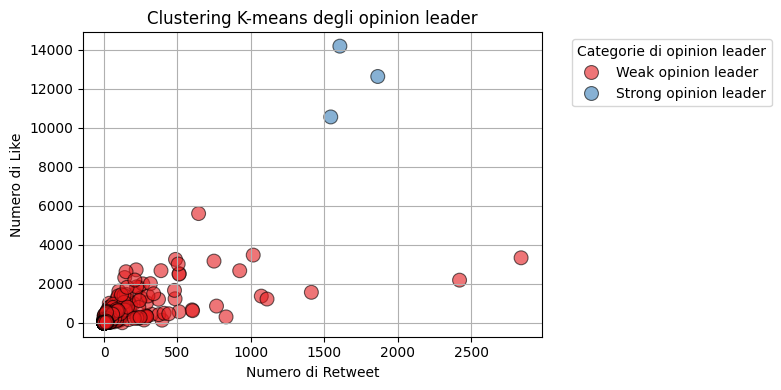

In [158]:
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data = merge_4_pos,
    x = 'retweet_count',
    y = 'like_count',
    hue = 'opinion_leader',
    palette = 'Set1',
    s = 100,
    alpha = 0.6,
    edgecolor = 'black' 
)

plt.xlabel('Numero di Retweet')
plt.ylabel('Numero di Like')
plt.title('Clustering K-means degli opinion leader')
plt.legend(title='Categorie di opinion leader', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout() 
plt.show()

In [159]:
strong_opinion_leaders = merge_4_pos[merge_4_pos['opinion_leader'] == 'Strong opinion leader']

# Conta e stampa il numero di strong opinion leader
num_strong_opinion_leaders = strong_opinion_leaders.shape[0]
print(f"Numero di strong opinion leader: {num_strong_opinion_leaders}")

# Conta e stampa il numero di tweet per ciascun strong opinion leader
tweet_counts = strong_opinion_leaders['author_id'].value_counts()
print("\nNumero di tweet per ciascun strong opinion leader:")
for author_id, count in tweet_counts.items():
    print(f"Autor ID: {author_id}, Numero di tweet: {count}")

# Stampa le informazioni dei tweet degli strong opinion leader
table = strong_opinion_leaders[['retweet_count', 'like_count', 'quote_count', 'reply_count', 
                                'author_id', 'tweet_id', 'content', 'description', 
                                'Sentiment', 'collection']].reset_index(drop=True)

# Converti il dataframe in una lista di tuple per tabulate
table_data = [tuple(x) for x in table.values]

# Intestazioni delle colonne per la tabella
headers = ['Retweet Count', 'Like Count', 'Quote Count', 'Reply Count', 
           'Author ID', 'Tweet ID', 'Content', 'Description', 
           'Sentiment', 'Collection']
print("\nInformazioni dettagliate dei tweet degli strong opinion leader:")
print(tabulate(table_data, headers=headers, tablefmt='grid'))

# Filtra le informazioni degli utenti per gli strong opinion leader
strong_opinion_leader_ids = strong_opinion_leaders['author_id'].unique()
strong_opinion_leader_info = tweet_users[tweet_users['user_id'].isin(strong_opinion_leader_ids)]

# Converti il dataframe in una lista di tuple per tabulate
user_table_data = [tuple(x) for x in strong_opinion_leader_info.values]

# Intestazioni delle colonne per la tabella delle informazioni degli utenti
user_headers = list(strong_opinion_leader_info.columns)
print("\nInformazioni degli utenti strong opinion leader:")
print(tabulate(user_table_data, headers=user_headers, tablefmt='grid'))


Numero di strong opinion leader: 3

Numero di tweet per ciascun strong opinion leader:
Autor ID: 871380288420667392, Numero di tweet: 1
Autor ID: 1043185714437992449, Numero di tweet: 1
Autor ID: 176228082, Numero di tweet: 1

Informazioni dettagliate dei tweet degli strong opinion leader:
+-----------------+--------------+---------------+---------------+---------------------+---------------------+------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------+-------------+--------------+
|   Retweet Count |   Like Count |   Quote Count |   Reply Count |           Author ID |            Tweet ID | Content                                                                            | Description                                                                                    | Sentiment   | Collection   |
+=================+==============+===============+===============

In [160]:
# Funzione per verificare la presenza di parole chiave relative agli NFT
def contains_nft_keywords(description, keywords=['nft', 'crypto', 'blockchain', 'digital art', 'doodles', 'apes', 'token', 'fungible', 'ethereum', 'collection', 'cryptopunks', 'nfts', 'nftcollector', 'opensea', 'cryptopunk']):
    tokens = word_tokenize(description.lower())
    filtered_tokens = [word for word in tokens if word.isalnum()]
    relevant_tokens = [word for word in filtered_tokens if word in keywords]
    return len(relevant_tokens) > 0

# Aggiungi una colonna che indica se la descrizione è inerente agli NFT
strong_opinion_leaders['dedito_agli_nft'] = strong_opinion_leaders['description'].apply(contains_nft_keywords)

print("Descrizioni e se sono inerenti agli NFT:")
print(strong_opinion_leaders[['description', 'dedito_agli_nft']])

# Funzione per analizzare il sentiment
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Aggiungi una colonna con il punteggio di sentiment
strong_opinion_leaders['description_sentiment'] = strong_opinion_leaders['description'].apply(analyze_sentiment)

# Filtra le descrizioni inerenti agli NFT
nft_related_descriptions = strong_opinion_leaders[strong_opinion_leaders['dedito_agli_nft']]

print("\nDescrizioni inerenti agli NFT e i loro sentiment:")
print(nft_related_descriptions[['description', 'description_sentiment', 'author_id', 'tweet_id']])

Descrizioni e se sono inerenti agli NFT:
                                            description  dedito_agli_nft
289   artist | 20 | mainly jjk and bnha | please do ...            False
1675  Join our podcast - In the Litter Box - Monday ...            False
3740  Watercolour/ ink artist in Toronto☃️ Commissio...            False

Descrizioni inerenti agli NFT e i loro sentiment:
Empty DataFrame
Columns: [description, description_sentiment, author_id, tweet_id]
Index: []


/var/folders/j6/1lxb8g2n5l52sjcnr7jwm8yc0000gn/T/ipykernel_6139/3293602307.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strong_opinion_leaders['dedito_agli_nft'] = strong_opinion_leaders['description'].apply(contains_nft_keywords)
/var/folders/j6/1lxb8g2n5l52sjcnr7jwm8yc0000gn/T/ipykernel_6139/3293602307.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strong_opinion_leaders['description_sentiment'] = strong_opinion_leaders['description'].apply(analyze_sentiment)
